In this project we take data of Airbnb listings in the US and try to predict the price of stay in that listing.
The source of the dataset:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## Acquaring and Loading Data

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In [1]:
#importing Required library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


sns.set()

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the datase C:\Users\Sagar Suraj Shirke\airbnnyc.csv
df=pd.read_csv(r"C:\Users\Sagar Suraj Shirke\airbnnyc.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.shape


(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Understadning, Wrangling and Cleaning Data 

In [7]:
#Finding missing values in dataset

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Replacing missing values 


<AxesSubplot:>

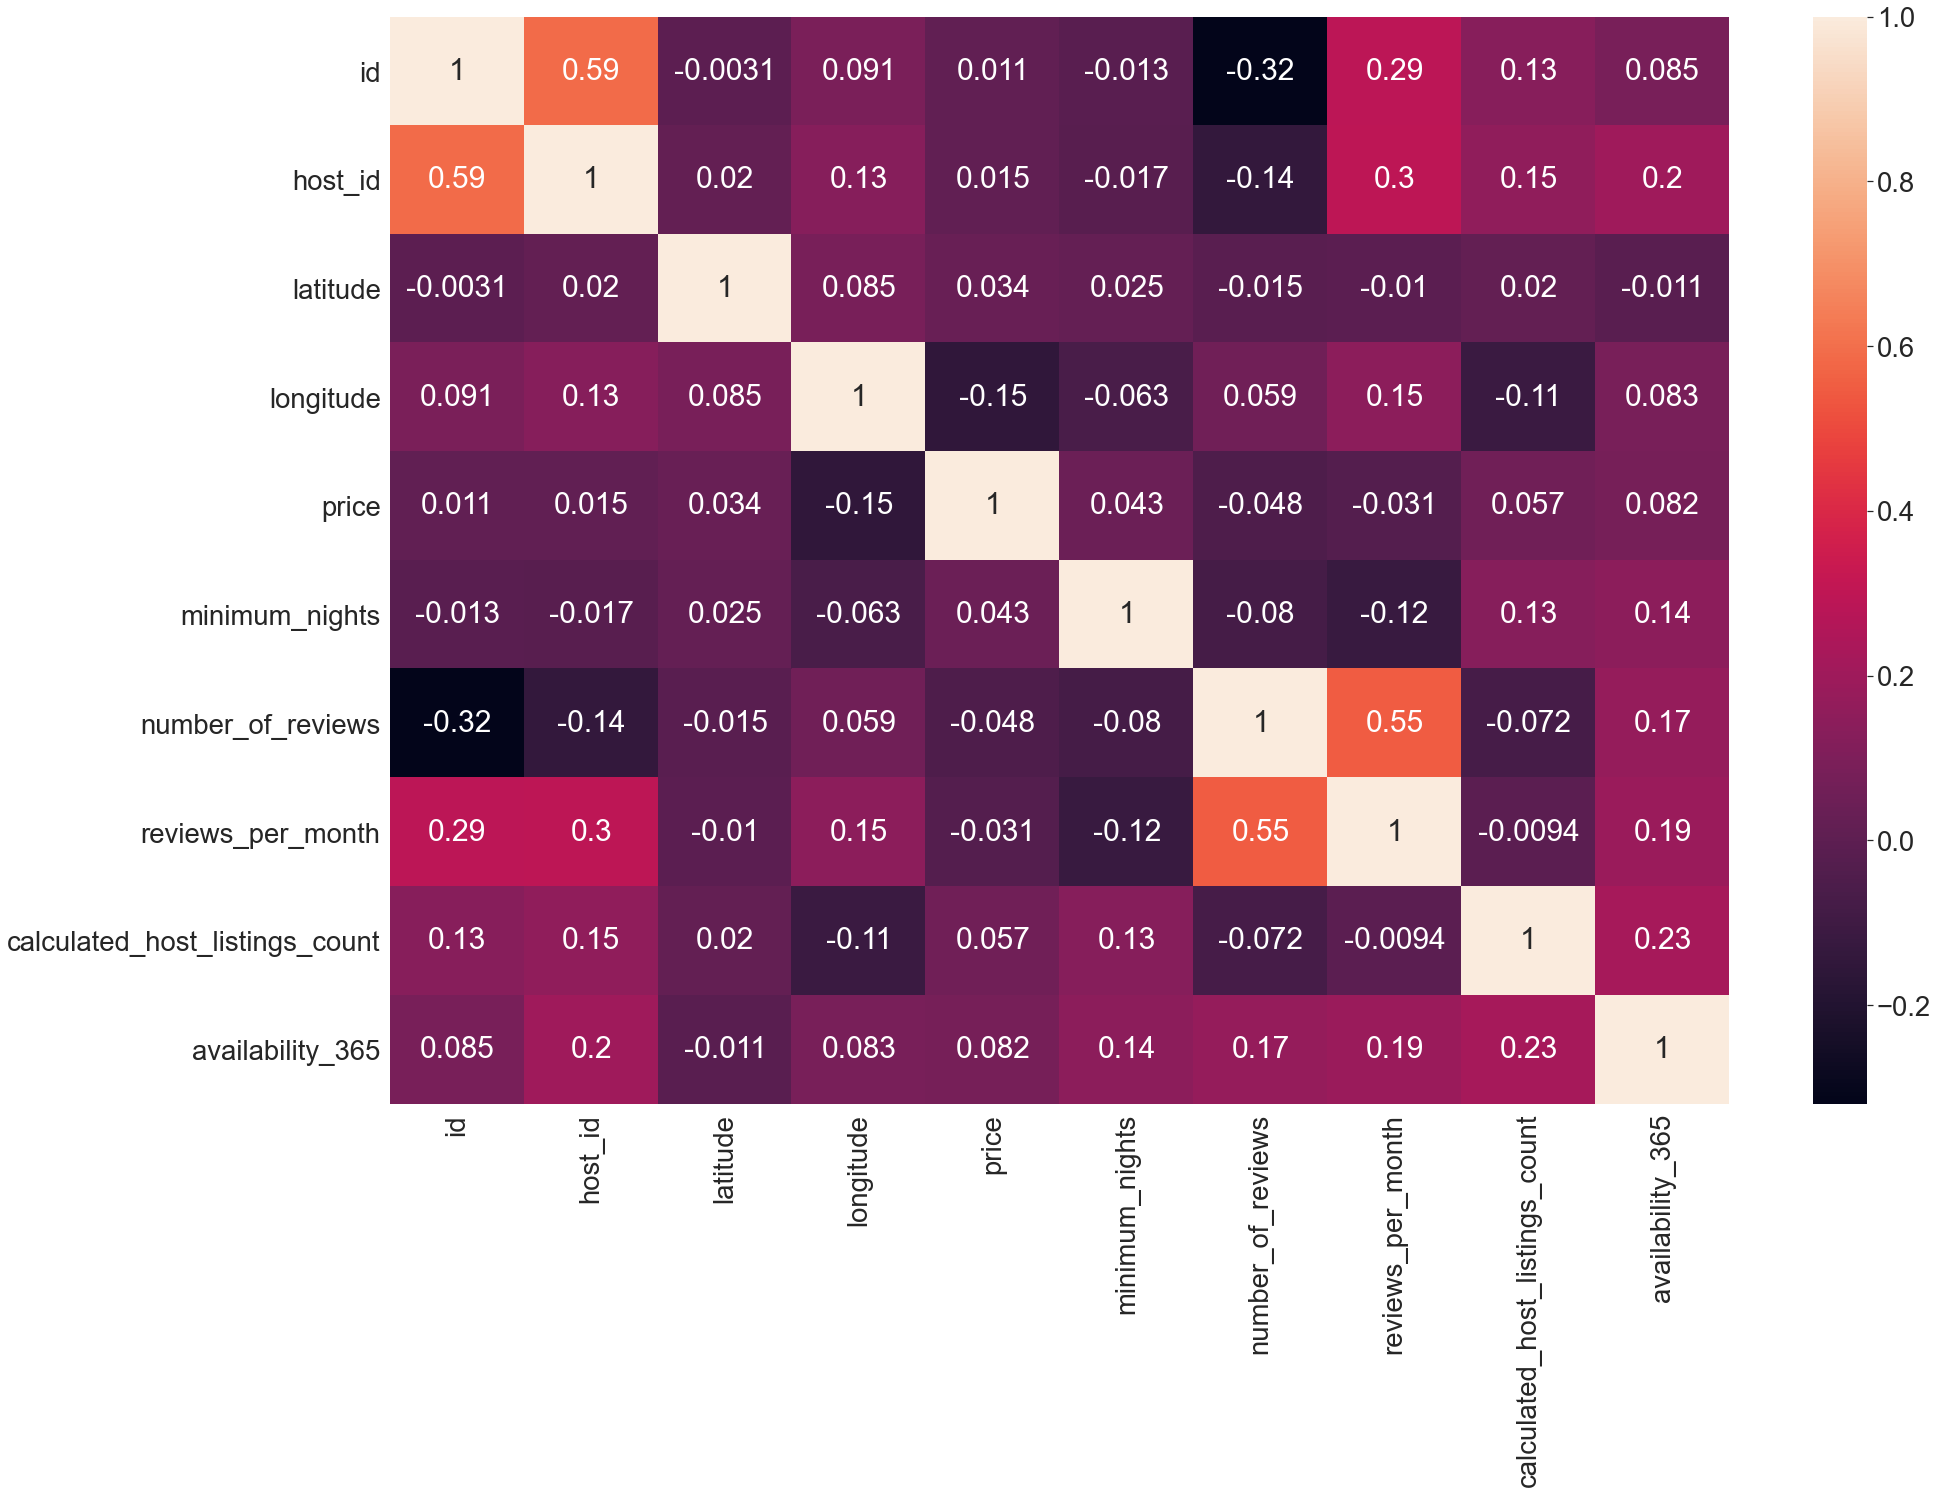

In [8]:
sns.set(font_scale=2.5)
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

1.As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns.

2.The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's



In [9]:
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')


In [10]:
df.fillna({'name':"NoName"}, inplace=True)
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# check number of null values by columns
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Exploratory Data Analysis (EDA)


<BarContainer object of 15 artists>

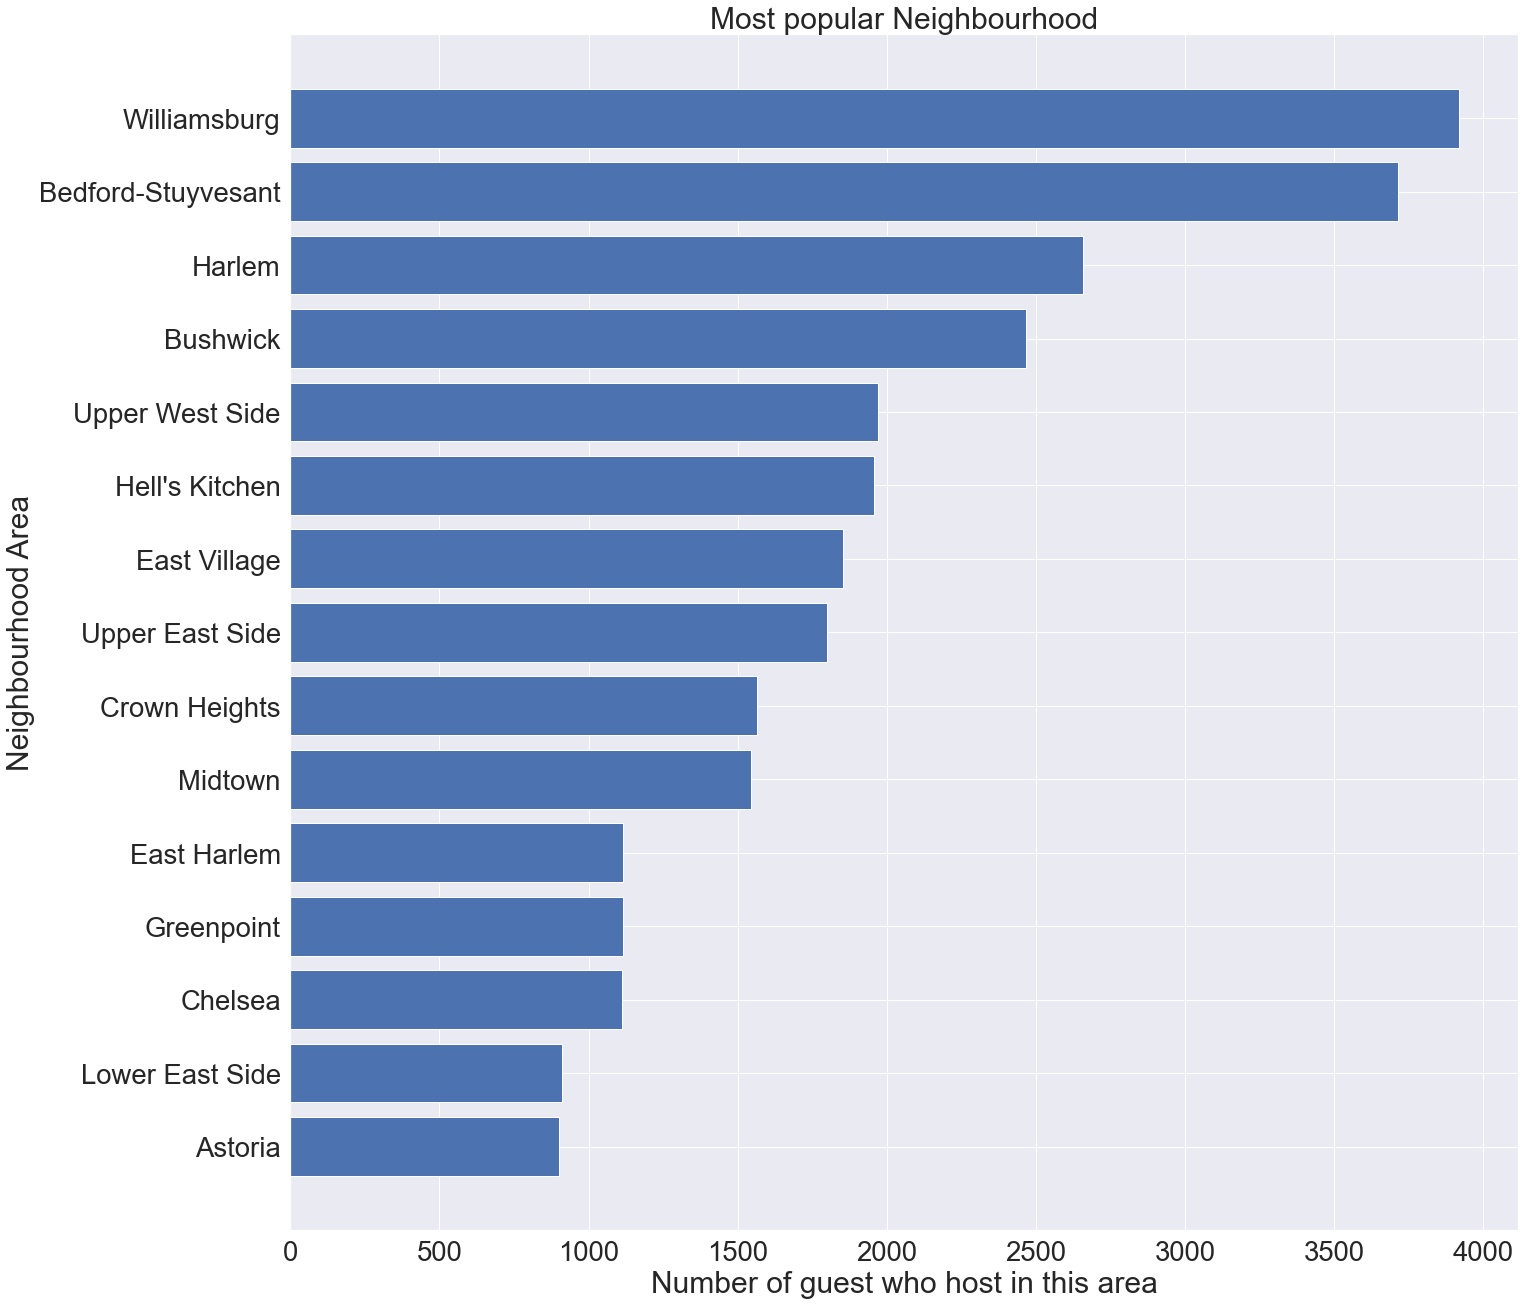

In [11]:
#Top Popular Nighbourhood

data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)

In [12]:
# Function to plot catplot graphs
def plot_catplot(h,v,he):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he)

In [13]:
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

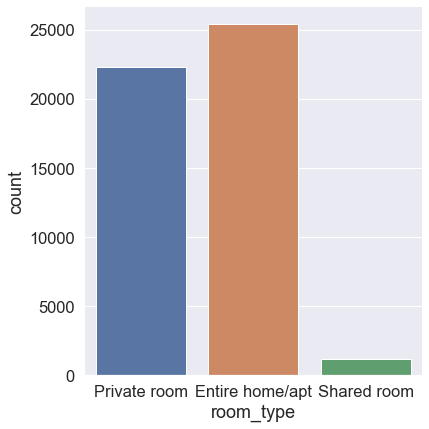

In [14]:
#Room_type count bar graph
plot_catplot("room_type","count",6)

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

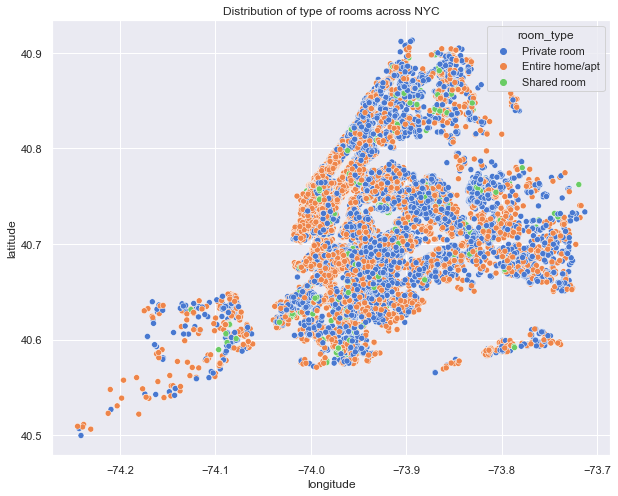

In [31]:
#Let's observe the type of rooms as well

sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

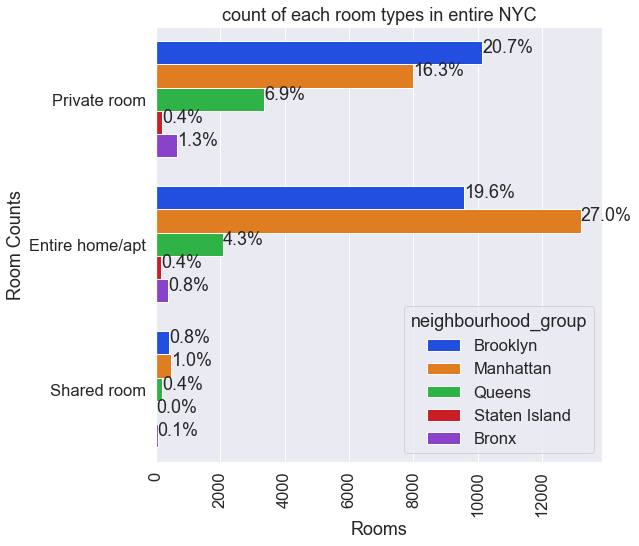

In [15]:
plt.rcParams['figure.figsize'] = (8, 8)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

### Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!

#### Expensive place of living in NYC


In [16]:
df[df.price>1000].sort_values(ascending=False,by="price")

#df.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0,1,0
29238,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,1,83
6530,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0,1,0
12342,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40638,"Meatpacking Events, Popups, Baby Showers, Phot...",78140736,Manhattan,West Village,40.73882,-74.00706,Entire home/apt,1050,1,0,0,1,48
5801,New York I Love You 7 Bedrooms,20318233,Brooklyn,Bedford-Stuyvesant,40.68542,-73.95184,Entire home/apt,1050,3,121,2,1,327
28952,Stunning Loft Penthouse Central Park Terrace New,157757066,Manhattan,Upper East Side,40.76683,-73.96867,Entire home/apt,1046,1,10,0,1,365
19803,5 Star Luxury Suite Heart of Manhattan,26556695,Manhattan,Midtown,40.76042,-73.97345,Entire home/apt,1020,1,12,0,6,365


In [17]:
df[df.price>1000].sort_values(ascending=False,by="price").neighbourhood_group.value_counts().iplot(kind="bar")

In [18]:
import plotly.express as px

fig = px.scatter(df[df.price>=1000], x="longitude", y="latitude", color="neighbourhood_group",size="price")
fig.update_layout(title="Neighbourhood and Prices (Price >= 1000)",
                  legend_title="Neighbourhood",
                  font=dict(
                      family="Helvetica",
                      size=16,
                  ))
fig.show()

#### Best Cheapest place of living in NYC


In [19]:
df[df.price<69].sort_values(ascending=False,by="price")


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4389,King Bed or Two Singles - You're choice!,7691518,Manhattan,Hell's Kitchen,40.76794,-73.98781,Private room,68,1,152,2,2,237
30295,"2 Bed/2 Bath, spacious, modern & bright!",174584122,Manhattan,Two Bridges,40.71124,-73.99456,Entire home/apt,68,3,64,3,1,13
45774,"""Dave's Island Suite""",258232863,Staten Island,New Springville,40.58647,-74.15954,Entire home/apt,68,2,8,5,1,4
12296,whole apartment & 2 cats!,49260425,Brooklyn,Bushwick,40.69544,-73.93221,Entire home/apt,68,3,1,0,1,0
20310,Comfy Sofa Bed in Cozy Apartment,89873550,Brooklyn,Bedford-Stuyvesant,40.68441,-73.95099,Shared room,68,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26259,the best you can find,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,1,0
25795,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4,6,222
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0,4,28


In [20]:
df[(df.price>10) & (df.price<69) ].sort_values(ascending=False,by="price").neighbourhood_group.value_counts().iplot(kind="bar")

In [21]:
import plotly.express as px

fig = px.scatter(df[df.price<=69], x="longitude", y="latitude", color="neighbourhood_group",
                 size="price")
fig.update_layout(title="Neighbourhood and Prices (Price <= 69)",
                  legend_title="Neighbourhood",
                  font=dict(
                      family="Helvetica",
                      size=16,
                  ))
fig.show()

In [26]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


### Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

In [22]:
df1= df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [23]:
top= df1.loc[df1.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top


,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


In [25]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6,1,0


Based on the graph, the most expensive listings tend to entire homes/apartments located in Brooklyn and Manhattan with an average price of 178 USD for entire homes in Brooklyn and an average price of 249 USD for entire homes in Manhattan respectively. This again may suggest that due to the popularity of those boroughs, this influences the price of the listings offered.
